**Step 1: Load and Preprocess the Data**

In [1]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import AdaBoostClassifier, RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
import xgboost as xgb
from keras.models import Sequential
from keras.layers import Dense
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.metrics import accuracy_score, classification_report
import numpy as np
import tensorflow as tf
from tensorflow import keras

# Load the training dataset
train_data = pd.read_csv('train.csv')

# Display basic information about the dataset
print(train_data.info())


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 23557 entries, 0 to 23556
Data columns (total 28 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   ID                        23557 non-null  object 
 1   Customer_ID               23557 non-null  object 
 2   Month                     23557 non-null  object 
 3   Name                      21208 non-null  object 
 4   Age                       23557 non-null  object 
 5   SSN                       23557 non-null  object 
 6   Occupation                23557 non-null  object 
 7   Annual_Income             23557 non-null  object 
 8   Monthly_Inhand_Salary     20024 non-null  float64
 9   Num_Bank_Accounts         23557 non-null  int64  
 10  Num_Credit_Card           23557 non-null  int64  
 11  Interest_Rate             23557 non-null  int64  
 12  Num_of_Loan               23557 non-null  object 
 13  Type_of_Loan              20949 non-null  object 
 14  Delay_

In [2]:
# Load the testing dataset
test_data = pd.read_csv('test.csv')

# Display basic information about the dataset
print(test_data.info())


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 23913 entries, 0 to 23912
Data columns (total 27 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   ID                        23913 non-null  object 
 1   Customer_ID               23913 non-null  object 
 2   Month                     23913 non-null  object 
 3   Name                      21451 non-null  object 
 4   Age                       23913 non-null  object 
 5   SSN                       23913 non-null  object 
 6   Occupation                23913 non-null  object 
 7   Annual_Income             23913 non-null  object 
 8   Monthly_Inhand_Salary     20283 non-null  float64
 9   Num_Bank_Accounts         23913 non-null  int64  
 10  Num_Credit_Card           23913 non-null  int64  
 11  Interest_Rate             23913 non-null  int64  
 12  Num_of_Loan               23913 non-null  object 
 13  Type_of_Loan              21189 non-null  object 
 14  Delay_

**Preprocessing and Feature Engineering**

In [3]:
# Handle missing values
train_data.fillna(method='ffill', inplace=True)
test_data.fillna(method='ffill', inplace=True)

In [4]:
# Combine training and test data for label encoding consistency
combined_data = pd.concat([train_data, test_data])

In [5]:
print(combined_data.dtypes)


ID                           object
Customer_ID                  object
Month                        object
Name                         object
Age                          object
SSN                          object
Occupation                   object
Annual_Income                object
Monthly_Inhand_Salary       float64
Num_Bank_Accounts             int64
Num_Credit_Card               int64
Interest_Rate                 int64
Num_of_Loan                  object
Type_of_Loan                 object
Delay_from_due_date           int64
Num_of_Delayed_Payment       object
Changed_Credit_Limit         object
Num_Credit_Inquiries        float64
Credit_Mix                   object
Outstanding_Debt             object
Credit_Utilization_Ratio    float64
Credit_History_Age           object
Payment_of_Min_Amount        object
Total_EMI_per_month         float64
Amount_invested_monthly      object
Payment_Behaviour            object
Monthly_Balance              object
Credit_Score                

In [6]:
combined_data['Monthly_Balance'] = combined_data['Monthly_Balance'].astype(str)


In [7]:
combined_data['Credit_Score'] = combined_data['Credit_Score'].astype(str)


In [8]:
print(combined_data.dtypes)


ID                           object
Customer_ID                  object
Month                        object
Name                         object
Age                          object
SSN                          object
Occupation                   object
Annual_Income                object
Monthly_Inhand_Salary       float64
Num_Bank_Accounts             int64
Num_Credit_Card               int64
Interest_Rate                 int64
Num_of_Loan                  object
Type_of_Loan                 object
Delay_from_due_date           int64
Num_of_Delayed_Payment       object
Changed_Credit_Limit         object
Num_Credit_Inquiries        float64
Credit_Mix                   object
Outstanding_Debt             object
Credit_Utilization_Ratio    float64
Credit_History_Age           object
Payment_of_Min_Amount        object
Total_EMI_per_month         float64
Amount_invested_monthly      object
Payment_Behaviour            object
Monthly_Balance              object
Credit_Score                

In [9]:
# Encode categorical variables using Label Encoding
label_encoders = {}
for column in combined_data.select_dtypes(include=['object']).columns:
    le = LabelEncoder()
    combined_data[column] = le.fit_transform(combined_data[column])
    label_encoders[column] = le

In [10]:
# Split data into features and target
X_train = combined_data[:len(train_data)].drop('Credit_Score', axis=1)
y_train = combined_data[:len(train_data)]['Credit_Score']
X_test = combined_data[len(train_data):]

**Feature Scaling**

In [11]:
X_train

,ID,Customer_ID,Month,Name,Age,SSN,Occupation,Annual_Income,Monthly_Inhand_Salary,Num_Bank_Accounts,...,Num_Credit_Inquiries,Credit_Mix,Outstanding_Debt,Credit_Utilization_Ratio,Credit_History_Age,Payment_of_Min_Amount,Total_EMI_per_month,Amount_invested_monthly,Payment_Behaviour,Monthly_Balance
0,3947,5886,4,48,155,4886,12,2776,1824.843333,3,...,4.0,3,5805,26.822620,180,1,49.574949,38835,4,20008
1,3948,5886,3,48,155,4886,12,2776,1824.843333,3,...,4.0,1,5805,31.944960,180,1,49.574949,3607,5,14874
2,3949,5886,7,48,0,4886,12,2776,1824.843333,3,...,4.0,1,5805,28.609352,184,1,49.574949,39117,6,23044
3,3950,5886,0,48,155,4886,12,2776,1824.843333,3,...,4.0,1,5805,31.377862,185,1,49.574949,14277,7,5415
4,3951,5886,8,48,155,4886,12,2776,1824.843333,3,...,4.0,1,5805,24.797347,186,1,49.574949,26221,3,24512
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
23552,39275,2870,4,1371,343,4545,1,3304,1932.282500,7,...,7.0,0,4228,38.326376,346,2,99.510260,41902,4,10121
23553,39276,2870,3,1371,343,4545,1,3304,1932.282500,7,...,10.0,0,4228,35.403798,347,2,99.510260,18881,3,20865
23554,39277,2870,7,1371,343,4545,1,3304,1932.282500,7,...,10.0,0,4228,39.946760,348,2,99.510260,12630,0,3384
23555,39278,2870,0,1371,343,4545,1,3304,1932.282500,7,...,1970.0,0,4228,30.492382,338,2,99.510260,31397,4,17463


In [12]:
X_test

,ID,Customer_ID,Month,Name,Age,SSN,Occupation,Annual_Income,Monthly_Inhand_Salary,Num_Bank_Accounts,...,Credit_Mix,Outstanding_Debt,Credit_Utilization_Ratio,Credit_History_Age,Payment_of_Min_Amount,Total_EMI_per_month,Amount_invested_monthly,Payment_Behaviour,Monthly_Balance,Credit_Score
0,3955,5886,11,48,155,4886,12,2776,1824.843333,3,...,1,5805,35.030402,190,1,49.574949,17403,7,3089,3
1,3956,5886,10,48,174,4886,12,2776,1824.843333,3,...,1,5805,33.053114,181,1,49.574949,15278,3,27013,3
2,3957,5886,9,48,174,4886,12,2776,1824.843333,3,...,1,5805,33.811894,181,1,49.574949,8482,6,10957,3
3,3958,5886,2,48,187,4886,12,2776,1824.843333,3,...,1,5805,32.430559,191,1,49.574949,25408,3,24828,3
4,3967,502,11,3961,224,25,15,4794,3037.986667,2,...,1,5191,25.926822,244,1,18.816215,25507,2,36439,3
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
23908,3942,2092,11,1501,238,3853,15,259,8813.142500,7,...,2,91,27.098619,30,2,0.000000,39207,5,23163,3
23909,3943,2092,10,1182,238,3853,7,259,8813.142500,7,...,2,91,37.010955,31,2,0.000000,13880,4,46410,3
23910,3944,2092,9,1182,238,3853,7,259,8813.142500,7,...,2,91,33.765425,32,2,0.000000,11411,3,46549,3
23911,3945,2092,2,1182,238,3853,7,259,8813.142500,7,...,2,91,34.918296,33,2,0.000000,20893,0,45254,3


In [13]:
# Initialize StandardScaler
scaler = StandardScaler()

# Define the columns to be scaled
columns_to_scale = X_train.columns

# Fit and transform X_train
X_train_scaled = scaler.fit_transform(X_train[columns_to_scale])

# Transform X_test using the same scaler
X_test_scaled = scaler.transform(X_test[columns_to_scale])


In [14]:
# Encode the target variable 'y_train'
le_target = LabelEncoder()
y_train_encoded = le_target.fit_transform(y_train)

In [15]:
# Split the data into training and testing sets
X_train, X_val, y_train, y_val = train_test_split(X_train_scaled, y_train_encoded, test_size=0.2, random_state=42)


In [16]:
# Initialize classifiers
classifiers = {
    "Logistic Regression": LogisticRegression(),
    "SVM": SVC(),
    "K Neighbors": KNeighborsClassifier(),
    "AdaBoost": AdaBoostClassifier(),
    "Random Forest": RandomForestClassifier(),
    "Decision Tree": DecisionTreeClassifier(),
    "XGBoost": xgb.XGBClassifier(),
    "ANN": keras.Sequential([
        keras.layers.Dense(units=128, activation='relu', input_dim=X_train.shape[1]),
        keras.layers.Dense(units=64, activation='relu'),
        keras.layers.Dense(units=len(np.unique(y_train)), activation='softmax')
    ])
}

# Train and evaluate classifiers
results = {}
for name, clf in classifiers.items():
    if name == "ANN":
        if y_train.dtype == 'O':  # Convert labels to integers for ANN
            le = LabelEncoder()
            y_train_encoded = le.fit_transform(y_train)
            y_val_encoded = le.transform(y_val)

            clf.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])
            clf.fit(X_train, y_train_encoded, epochs=10, batch_size=32, verbose=0)
            y_pred_prob = clf.predict(X_val)
            y_pred = np.argmax(y_pred_prob, axis=1)
        else:
            clf.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])
            clf.fit(X_train, y_train, epochs=10, batch_size=32, verbose=0)
            y_pred_prob = clf.predict(X_val)
            y_pred = np.argmax(y_pred_prob, axis=1)
    else:
        clf.fit(X_train, y_train)
        y_pred = clf.predict(X_val)

    accuracy = accuracy_score(y_val, y_pred)
    results[name] = accuracy

# Display results
for name, accuracy in results.items():
    print(f"{name}: Accuracy = {accuracy:.4f}")
    print(f"{name} Classification Report:")
    print(classification_report(y_val, y_pred))
    print("="*50)


148/148 [==============================] - 0s 1ms/step
Logistic Regression: Accuracy = 0.5932
Logistic Regression Classification Report:
              precision    recall  f1-score   support

           0       0.58      0.50      0.53       797
           1       0.66      0.54      0.59      1418
           2       0.67      0.77      0.72      2497

    accuracy                           0.66      4712
   macro avg       0.64      0.60      0.62      4712
weighted avg       0.65      0.66      0.65      4712

SVM: Accuracy = 0.6473
SVM Classification Report:
              precision    recall  f1-score   support

           0       0.58      0.50      0.53       797
           1       0.66      0.54      0.59      1418
           2       0.67      0.77      0.72      2497

    accuracy                           0.66      4712
   macro avg       0.64      0.60      0.62      4712
weighted avg       0.65      0.66      0.65      4712

K Neighbors: Accuracy = 0.6458
K Neighbors Classifi

**Visualization**

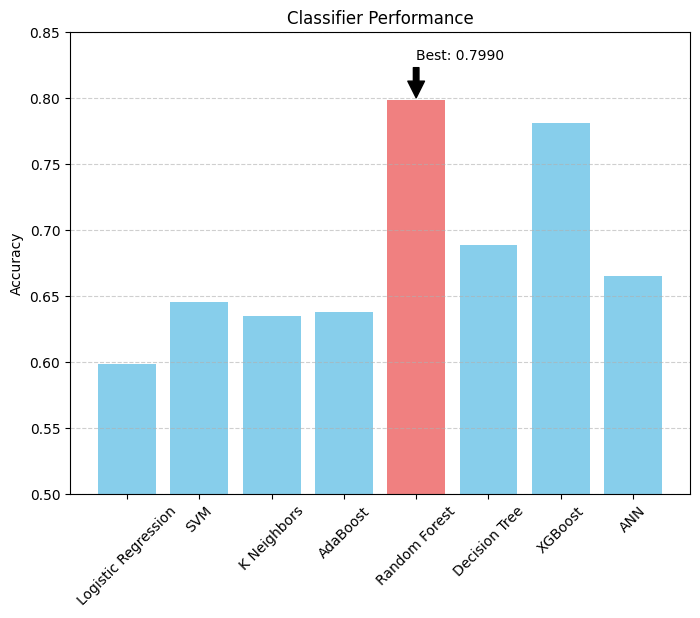

In [23]:
import matplotlib.pyplot as plt

# Define the classifiers and their respective accuracies
classifiers = ["Logistic Regression", "SVM", "K Neighbors", "AdaBoost", "Random Forest", "Decision Tree", "XGBoost", "ANN"]
accuracies = [0.5986,0.6460,0.6354,0.6381,0.7990,0.6889,0.7812,0.6655]
# Find the index of the best accuracy
best_index = accuracies.index(max(accuracies))

# Create a list of colors, with the best classifier in a different color
colors = ['skyblue'] * len(classifiers)
colors[best_index] = 'lightcoral'

# Create a vertical bar plot
plt.figure(figsize=(8, 6))
bars = plt.bar(classifiers, accuracies, color=colors)

# Annotate the best classifier with an arrow
plt.annotate(f'Best: {accuracies[best_index]:.4f}', xy=(best_index, accuracies[best_index]), xytext=(best_index, accuracies[best_index] + 0.03),
             arrowprops=dict(facecolor='black', shrink=0.05))

plt.ylabel('Accuracy')
plt.title('Classifier Performance')
plt.ylim(0.5, 0.85)  # Adjusted limits to better fit the accuracy range
plt.xticks(rotation=45)  # Rotate the x-axis labels for better readability
plt.grid(axis='y', linestyle='--', alpha=0.6)

plt.show()
